In [106]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import DistanceMetric
import numpy as np
import scipy
from pathlib import Path  

In [116]:
df = pd.read_csv('/home/jovyan/bipolar_ref_ieeg/coord_data.csv')
pd.unique(df.Channel_Name)


df["PadType"] = df['Channel_Name'].str.replace('\d+', '')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Unnamed: 0,Channel_Name,x_coord,y_coord,z_coord,coil_type,kind,logno,scanno,cal,range,unit,unit_mul,coord_frame,PadType
0,0,P01,-0.049895,-0.063538,0.034958,1,902,1,1,1.0,0.000001,107,0,4,P
1,1,P02,-0.055895,-0.054538,0.032958,1,902,2,2,1.0,0.000001,107,0,4,P
2,2,P03,-0.059895,-0.047538,0.029958,1,902,3,3,1.0,0.000001,107,0,4,P
3,3,P04,-0.063895,-0.038538,0.025958,1,902,4,4,1.0,0.000001,107,0,4,P
4,4,P05,-0.067895,-0.029538,0.021958,1,902,5,5,1.0,0.000001,107,0,4,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,F15,-0.054895,0.027462,0.051958,1,902,108,108,1.0,0.000001,107,0,4,F
108,108,F16,-0.056895,0.019462,0.055958,1,902,109,109,1.0,0.000001,107,0,4,F
109,109,thor+,NaN,NaN,NaN,0,302,110,110,1.0,0.000001,107,0,4,thor+
110,110,abdo+,NaN,NaN,NaN,0,302,111,111,1.0,0.000001,107,0,4,abdo+


In [161]:
uniquePadTypes = pd.unique(df["PadType"])
print(uniquePadTypes)

for pad in uniquePadTypes:
    padIDX = df["PadType"] == pad
    padDistances = dist_df.loc[padIDX.tolist(),padIDX.tolist()]
    
    
padIDX = df["PadType"] == "P"
padDistances = dist_df.loc[padIDX.tolist(),padIDX.tolist()]

padDistances



['P' 'Fb' 'MKR+' 'vT' 'sT' 'T' 'ECG+' 'R+' 'F' 'thor+' 'abdo+']


Channel_Name,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48
Channel_Name,,,,,,,,,,,,,,,,,,,,,
P01,0.000000,0.011000,0.019519,0.030033,0.040608,0.051720,0.062209,0.072014,0.010770,0.015620,...,0.075637,0.083259,0.050813,0.052393,0.055299,0.059825,0.065192,0.072677,0.080585,0.087052
P02,0.011000,0.000000,0.008602,0.019209,0.029833,0.041110,0.051817,0.061798,0.014318,0.010440,...,0.066453,0.073926,0.051585,0.050813,0.051778,0.054681,0.058609,0.064877,0.072173,0.078365
P03,0.019519,0.008602,0.000000,0.010630,0.021260,0.032650,0.043486,0.053563,0.021656,0.014177,...,0.060216,0.067298,0.054653,0.052173,0.051585,0.052972,0.055399,0.060241,0.066716,0.072450
P04,0.030033,0.019209,0.010630,0.000000,0.010630,0.022113,0.033076,0.043243,0.031591,0.022847,...,0.053226,0.059515,0.059716,0.055453,0.053141,0.052621,0.052972,0.055642,0.060745,0.065666
P05,0.040608,0.029833,0.021260,0.010630,0.000000,0.011747,0.022869,0.033121,0.041869,0.032696,...,0.047603,0.052735,0.066114,0.060448,0.056683,0.054387,0.052621,0.052811,0.056169,0.060008
P06,0.051720,0.041110,0.032650,0.022113,0.011747,0.000000,0.011180,0.021471,0.052640,0.043394,...,0.042071,0.045200,0.072533,0.065711,0.060836,0.056956,0.053075,0.050408,0.051430,0.053638
P07,0.062209,0.051817,0.043486,0.033076,0.022869,0.011180,0.000000,0.010296,0.063135,0.054019,...,0.040559,0.040963,0.080100,0.072615,0.067127,0.062201,0.056763,0.051633,0.050200,0.050418
P08,0.072014,0.061798,0.053563,0.043243,0.033121,0.021471,0.010296,0.000000,0.073007,0.064016,...,0.042273,0.039975,0.087966,0.080081,0.074229,0.068622,0.062129,0.055191,0.051672,0.049980
P09,0.010770,0.014318,0.021656,0.031591,0.041869,0.052640,0.063135,0.073007,0.000000,0.010198,...,0.070520,0.078943,0.040915,0.042485,0.045629,0.050784,0.057079,0.065742,0.074525,0.081695


In [107]:
dist = DistanceMetric.get_metric('euclidean')
#dist.pairwise(df[['x_coord','y_coord','z_coord']].to_numpy())
tmp = scipy.spatial.distance.cdist(df[['x_coord','y_coord','z_coord']].to_numpy(), df[['x_coord','y_coord','z_coord']].to_numpy())

dist_df = pd.DataFrame(tmp)
dist_df["Channel_Name"] = df.Channel_Name
dist_df = dist_df.set_index("Channel_Name")
dist_df.columns = df.Channel_Name

filepath = Path('/home/jovyan/bipolar_ref_ieeg/dist_data.csv')  
dist_df.to_csv(filepath)

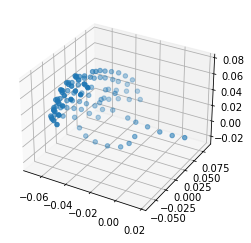

In [62]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.x_coord,df.y_coord,df.z_coord) # plot the point (2,3,4) on the figure

plt.show()

In [1]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
from mne_bids.path import get_bids_path_from_fname
from ecog_preproc_utils import transformData
#!pip install ipympl
#!pip install mne_bids
#%matplotlib qt
#%matplotlib tk

In [2]:
# Change these variables to work for your block
subj = '06'
sess = 'iemu'
task = 'film'
acq = 'clinical'
run = 1

In [3]:
# Change the data directory below to where your data are located. 
data_dir = f'/home/jovyan/shared/ds003688/sub-{subj}/ses-{sess}/ieeg/'
channel_path = f'{data_dir}/sub-{subj}_ses-{sess}_task-{task}_acq-{acq}_run-{run}_channels.tsv'
raw_path = f'{data_dir}/sub-{subj}_ses-{sess}_task-{task}_acq-{acq}_run-{run}_ieeg.vhdr'

bids_path = get_bids_path_from_fname(raw_path)
base_name = os.path.basename(raw_path).split('.')[0]

# Read data and extract parameters from BIDS files
raw = read_raw_bids(bids_path, verbose=True)

raw.load_data()
raw.info

Extracting parameters from /home/jovyan/shared/ds003688/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Reading events from /home/jovyan/shared/ds003688/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_task-film_run-1_events.tsv.
Reading channel info from /home/jovyan/shared/ds003688/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_task-film_acq-clinical_run-1_channels.tsv.
Reading electrode coords from /home/jovyan/shared/ds003688/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_acq-clinical_electrodes.tsv.
Reading 0 ... 203145  =      0.000 ...   396.768 secs...


/tmp/ipykernel_236/3566553181.py:10: RuntimeWarning: The unit for channel(s) MKR1+, MKR2+ has changed from V to NA.
  raw = read_raw_bids(bids_path, verbose=True)


<Info | 11 non-empty values
 bads: 3 items (P48, MKR1+, T03)
 ch_names: P01, P02, P03, P04, P05, P06, P07, P08, P09, P10, P11, P12, P13, ...
 chs: 104 ECoG, 2 Stimulus, 1 ECG, 3 misc, 2 EMG
 custom_ref_applied: False
 dig: 104 items (104 EEG)
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 256.0 Hz
 meas_date: 1900-01-01 00:00:00 UTC
 nchan: 112
 projs: []
 sfreq: 512.0 Hz
 subject_info: 10 items (dict)
>

In [48]:
channelInfo = raw.info['chs']
channelDF = pd.DataFrame(channelInfo)
channelDF = channelDF.set_index("ch_name")
pd.unique(channelDF["kind"])

channel902 = channelDF[channelDF["kind"] == 902]
x,y,z=channel902["loc"][0][0:3]
x,y,z=channel902["loc"][:][0:3]



,coil_type,kind,logno,scanno,cal,range,loc,unit,unit_mul,coord_frame
ch_name,,,,,,,,,,
P01,1,902,1,1,1.0,0.000001,"[-0.049895, -0.063538, 0.034957999999999996, 0...",107,0,4
P02,1,902,2,2,1.0,0.000001,"[-0.055895, -0.054537999999999996, 0.032958, 0...",107,0,4
P03,1,902,3,3,1.0,0.000001,"[-0.059895000000000004, -0.047538, 0.029958, 0...",107,0,4
P04,1,902,4,4,1.0,0.000001,"[-0.06389500000000001, -0.038537999999999996, ...",107,0,4
P05,1,902,5,5,1.0,0.000001,"[-0.067895, -0.029538000000000002, 0.021958, 0...",107,0,4
...,...,...,...,...,...,...,...,...,...,...
F15,1,902,108,108,1.0,0.000001,"[-0.054895000000000006, 0.027462, 0.051958, 0....",107,0,4
F16,1,902,109,109,1.0,0.000001,"[-0.056895, 0.019462, 0.055958, 0.0, 0.0, 0.0,...",107,0,4
thor+,0,302,110,110,1.0,0.000001,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",107,0,4


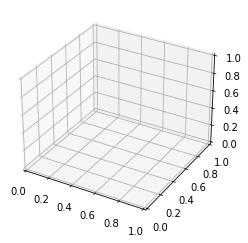

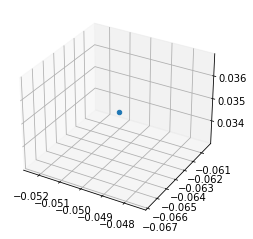

In [36]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z) # plot the point (2,3,4) on the figure

plt.show()